In [2]:
# 타이타닉 생존자 예측 과제
# 데이터 로드
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head(), df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

Text(0.5, 1.0, 'Missing Values Heatmap')

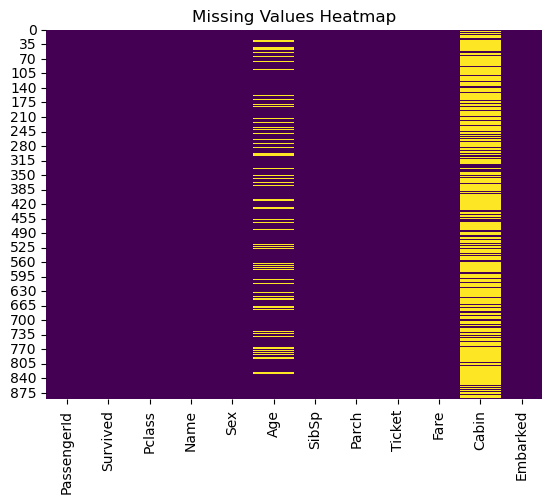

In [3]:
# 결측치 찾기
df.isnull().sum()  # 결측치 개수 확인
# 결측치 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

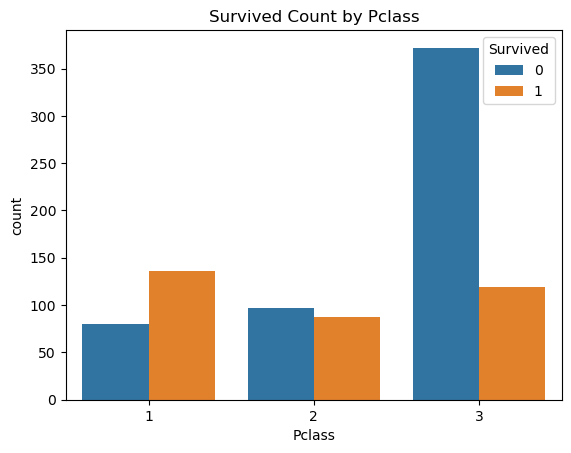

In [4]:
# 생존자들의 등급 확인
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survived Count by Pclass')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
# Age 결측치는 중앙값으로
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked 결측치는 최빈값으로
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Label Encoding (Sex, Embarked)
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])  # female=0, male=1

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])  # C=0, Q=1, S=2 (알파벳 순)

# 필요 없는 열 제거
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

C:\Users\wjdgn\AppData\Local\Temp\ipykernel_27060\3611784152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\wjdgn\AppData\Local\Temp\ipykernel_27060\3611784152.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [6]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# 예측 및 평가
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[98 12]
 [23 46]]


In [8]:
# 나이브 베이즈 모델 학습
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
# 예측 및 평가
y_pred_nb = model_nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[92 18]
 [21 48]]


## 간단한 요약 메모

Titanic 데이터셋을 이용해 Logistic Regression과 Gaussian Naive Bayes 모델로 생존 여부를 예측하였다.  
두 모델 모두 적절한 정확도를 보였으며, 전처리로는 결측치 처리 및 Label Encoding 방식을 적용하였다.

## 모델 성능 지표 비교

| 항목 | **Logistic Regression** | **Gaussian Naive Bayes** |
|------|--------------------------|---------------------------|
| 정확도 (Accuracy) | **0.804** | 0.782 |
| 정밀도 (Precision, class 1) | 0.79 | 0.73 |
| 재현율 (Recall, class 1) | 0.67 | **0.70** |
| F1-score (class 1) | **0.72** | 0.71 |
| 오탐 (False Positive) | 12 | 18 |
| 미탐 (False Negative) | 23 | **21** |

- **오탐 (False Positive)**: 실제 사망했는데 생존했다고 예측  
- **미탐 (False Negative)**: 실제 생존했는데 사망했다고 예측  

## ⚖️ 모델별 장단점 및 개선 아이디어

### 🔹 Logistic Regression
- **장점**
  - 해석 가능성이 높고 성능 안정적
  - F1-score 및 정확도에서 우수
- **단점**
  - 선형 모델이므로 복잡한 결정 경계 학습에는 한계
- **개선 아이디어**
  - 상호작용 항 추가
  - 다항항, 다항식 회귀 등 비선형 확장
  - 정규화 (L1/L2) 튜닝

### 🔹 Gaussian Naive Bayes
- **장점**
  - 구현 간단하고 빠름
  - 적은 데이터에도 성능이 나쁘지 않음
  - 생존자(소수 클래스) recall이 높음
- **단점**
  - 특성 간 독립 가정이 실제와 다를 수 있음
  - 오탐이 더 많음
- **개선 아이디어**
  - 특성 간 상관 고려 (e.g. tree 기반 모델)
  - 특성 스케일링 또는 로그 변환
  - 다항 나이브 베이즈 등 다른 NB 변형 시도


**결론**: Logistic Regression이 전체적으로 더 안정적인 성능을 보였으나, Naive Bayes도 간단한 구조 대비 의미 있는 예측을 보임. 두 모델 모두 튜닝과 특성 확장을 통해 개선 가능함.
